In [219]:
# Import important library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Read the input file and check the data dimension

In [220]:
df = pd.read_csv('german_credit.csv')
df.head(5)
df.shape

(1000, 21)

In [221]:
# You can access from https://www.kaggle.com/uciml/german-credit
#Read input file and understand the data
# "default" is my dependent variable

### Q1 Randomly select 50% data for this use case( 1 Marks)
###### Hint: Use train_test_split

In [255]:
from sklearn.model_selection import train_test_split
gc_df_half1, gc_df_half2 = train_test_split(df, test_size=0.5, random_state = 101)
gc_df_half1.shape

(500, 8)

In [223]:
# Lets build a Ensemble model but need to modify the dataset first


### Q2.Prepare the model data by converting non-numeric to dummy ( 1 Marks)
##### Hint: Use get_dummies

In [224]:
# Print Shape of model data
# Convert categorical variable into dummy/indicator variables. As many columns will be created as distinct values
german_credit = pd.get_dummies(gc_df_half1, columns=['account_check_status', 'credit_history', 'purpose', 'savings', 'present_emp_since', 'personal_status_sex', 'other_debtors', 'property', 'other_installment_plans', 'housing', 'job', 'telephone', 'foreign_worker'])

In [225]:
#To convert it into a model, we drop the column 'default'
german_credit_model = german_credit.drop(['default'], axis = 1)

### Check for highly correlated variables but don't required any treatment for this use case

In [226]:
german_credit.describe()
german_credit.corr()

,default,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance,account_check_status_0 <= ... < 200 DM,account_check_status_< 0 DM,...,housing_own,housing_rent,job_management/ self-employed/ highly qualified employee/ officer,job_skilled employee / official,job_unemployed/ unskilled - non-resident,job_unskilled - resident,telephone_none,"telephone_yes, registered under the customers name",foreign_worker_no,foreign_worker_yes
default,1.000000,0.223669,0.100665,0.107718,0.001447,-0.104182,-0.046802,-0.027276,0.139990,0.239409,...,-0.103211,0.112749,0.043095,-3.098220e-02,-0.024137,0.009251,0.068472,-0.068472,-0.076630,0.076630
duration_in_month,0.223669,1.000000,0.622670,0.096635,-0.039605,-0.060186,-0.025304,-0.012285,0.162021,0.007594,...,-0.027878,-0.051602,0.129092,4.176750e-02,-0.021538,-0.150506,-0.134165,0.134165,-0.131336,0.131336
credit_amount,0.100665,0.622670,1.000000,-0.270269,-0.046820,0.047886,0.019211,0.071196,0.189529,-0.083689,...,-0.066899,-0.031707,0.327206,-9.402518e-02,-0.043004,-0.151188,-0.263775,0.263775,-0.081613,0.081613
installment_as_income_perc,0.107718,0.096635,-0.270269,1.000000,0.095869,0.005315,0.014576,-0.087065,-0.061495,0.112993,...,0.030200,-0.030472,0.028716,5.837869e-02,-0.071313,-0.064837,-0.038708,0.038708,-0.041957,0.041957
present_res_since,0.001447,-0.039605,-0.046820,0.095869,1.000000,0.259374,0.118962,0.087595,-0.059382,0.083783,...,-0.248045,0.135689,-0.013316,9.020609e-03,-0.040717,0.016853,-0.071390,0.071390,-0.046304,0.046304
age,-0.104182,-0.060186,0.047886,0.005315,0.259374,1.000000,0.189589,0.101770,-0.068431,-0.011560,...,0.067166,-0.210342,0.112800,-1.361963e-01,0.054201,0.042515,-0.150539,0.150539,-0.017796,0.017796
credits_this_bank,-0.046802,-0.025304,0.019211,0.014576,0.118962,0.189589,1.000000,0.127099,-0.011834,-0.053633,...,0.069610,-0.095685,0.068141,-6.396445e-02,0.027749,0.006144,-0.117323,0.117323,0.023587,-0.023587
people_under_maintenance,-0.027276,-0.012285,0.071196,-0.087065,0.087595,0.101770,0.127099,1.000000,-0.041311,0.025309,...,-0.009254,-0.084335,0.017821,-7.795120e-02,-0.041005,0.092642,-0.029501,0.029501,0.084458,-0.084458
account_check_status_0 <= ... < 200 DM,0.139990,0.162021,0.189529,-0.061495,-0.059382,-0.068431,-0.011834,-0.041311,1.000000,-0.371565,...,0.029032,-0.003648,0.066232,-6.364688e-02,0.029161,0.006838,-0.028467,0.028467,-0.077347,0.077347
account_check_status_< 0 DM,0.239409,0.007594,-0.083689,0.112993,0.083783,-0.011560,-0.053633,0.025309,-0.371565,1.000000,...,-0.137887,0.120742,-0.043395,-5.570534e-03,0.009153,0.039884,0.105762,-0.105762,0.095678,-0.095678


### Drop the original variables which are converted to dummy

In [227]:
# Convert categorical variable into dummy/indicator variables. As many columns will be created as distinct values
df = df.drop(['account_check_status', 'credit_history', 'purpose', 'savings', 'present_emp_since', 'personal_status_sex', 'other_debtors', 'property', 'other_installment_plans', 'housing', 'job', 'telephone', 'foreign_worker'], axis = 1)
df.shape

(1000, 8)

### Q3 Split Train/Test data 70:30 ratio( 1 Marks)
##### Hint:from sklearn.model_selection import train_test_split

In [228]:
Y = df['default']
X = df.drop('default' ,axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=51)

### Q4 Build Random Forest Model( 1 Marks)
#### Hint:from sklearn.ensemble import RandomForestClassifier using n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999

In [229]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999)
#Train the model using the training sets y_pred=clf.predict(X_test)
rf_fit = clf.fit(X_train,y_train)
y_pred=rf_fit.predict(X_test)
y_pred


array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], d

### Q5 Calculate Confusion Matrix and Accuracy score (1 Marks)
##### Hint: Use confusion_matrix and accuracy_score

In [230]:
from sklearn.metrics import confusion_matrix, accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.7133333333333334
Confusion Matrix:
 [[192  26]
 [ 60  22]]


### Q6 Show the list of the features importance( 1 Marks)

In [231]:
print("Importance of Features:", rf_fit.feature_importances_)

Importance of Features: [0.18462681 0.33838486 0.07039545 0.07823506 0.25162318 0.04612966
 0.03060497]


### Q7 K-fold cross-validation( 2 Marks)
##### k-fold cross validation( without stratification)
##### Usually k is set as 10-20 in practical settings, depends on data set size

In [232]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_val_predict

In [233]:
# Use below values
num_folds = 10
seed = 77

In [234]:
#Validate the Random Forest model build above using k fold
def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

In [235]:
array_german_credit = df1.values
X2 = array_german_credit[:,1:8]
Y2 = array_german_credit[:,0]
# feature extraction
scores = []
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=False)
for train_index, test_index in kfold.split(X2):
    X2_train, X2_test, y2_train, y2_test = X2[train_index], X2[test_index], Y2[train_index], Y2[test_index]
    scores.append(get_score(RandomForestClassifier(n_estimators = 500, n_jobs = 2, criterion = "entropy", random_state = 9999), X2_train, X2_test, y2_train, y2_test))
scores

[0.78, 0.67, 0.68, 0.75, 0.74, 0.62, 0.71, 0.77, 0.67, 0.7]

In [236]:
#Calculate Mean score

In [237]:
np.mean(scores)

0.7090000000000001

In [238]:
# Calculate score standard deviation using std()

In [239]:
np.std(scores)

0.04825971404805461

In [240]:
y_predict = cross_val_predict(RandomForestClassifier(n_estimators = 500, n_jobs = 2, criterion = "entropy", random_state = 9999), X2, Y2, cv=10)

# Q8 Print the confusion matrix( 1 Marks)

In [241]:
from sklearn.metrics import confusion_matrix, accuracy_score
print("Confusion Matrix:\n", confusion_matrix(Y2, y_predict))

Confusion Matrix:
 [[628  72]
 [218  82]]


# Q9.Classification accuracy: 
percentage of correct predictions and Calculate sensitivity (or True Positive Rate or Recall) and Precision.
( 1 Marks)

In [242]:
print("Accuracy:", accuracy_score(Y2, y_predict))

Accuracy: 0.71


In [243]:
from sklearn import metrics
print(metrics.classification_report(Y2,y_predict))

             precision    recall  f1-score   support

          0       0.74      0.90      0.81       700
          1       0.53      0.27      0.36       300

avg / total       0.68      0.71      0.68      1000



# Q10.Plot Receiver Operating Characteristic (ROC) Curves( 1 Marks)

In [244]:
#Hint: Use roc_curve

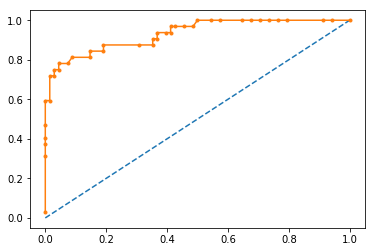

In [252]:
#Hint: Use roc_curve
from sklearn.metrics import roc_curve
model.fit(X_train, y_train)
probs = model.predict_proba(X2_test)
probs
probs = probs[:, 1]
fpr, tpr, thresholds = roc_curve(y2_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')

ROC curve can help you to choose a threshold that balances sensitivity and specificity in a way that makes sense for your particular context

# Q11. Calculate AUC(the percentage of the ROC plot that is underneath the curve) - optional

In [254]:
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y2_test, probs)
print('AUC: %.3f' % auc)

AUC: 0.932


### Bootstrapping ( Bonus)
##### Given a dataset of size n, a bootstrap sample is created by sampling n instances uniformly from the data (with/without replacement)
##### Create a model with each bootstrap sample and validate it with the test set
##### Final result is calculated by averaging the accuracy of models

In [247]:
# Number of iterations for bootstrapping
bootstrap_iteration = 10
accuracy = []

In [248]:
from sklearn.utils import resample
from sklearn.metrics import accuracy_score

for i in range(bootstrap_iteration):
    X_, y_ = resample(X_train, y_train)
    rfm.fit(X_, y_)
    y_pred = rfm.predict(X_test)
    
    acc = accuracy_score(y_pred, y_test)
    accuracy.append(acc)

NameError: name 'rfm' is not defined

In [ ]:
accuracy = np.array(accuracy)
print('Accuracy Score')
print('Avearge: ', accuracy.mean())
print('Standard deviation: ', accuracy.std())